In [139]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats

In [239]:
#Import dataset 
cardf = pd.read_csv(r"C:\Local\ALY6020_Predictive Analytics\Week 2\car.csv")
cardf.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [282]:
cardf.shape

(398, 8)

In [240]:
#displaying object info
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [241]:
#updating dtype of "Horsepower"
cardf["Horsepower"] = pd.to_numeric(cardf["Horsepower"], errors = "coerce")
#test
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [242]:
#checking null values
cardf.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [243]:
hp_na = cardf["Horsepower"].isna()
cardf[hp_na]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,0
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,0
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [244]:
#performing numerical analysis on 'Horsepower'
cardf['Horsepower'].describe([0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.99,1])

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
80%      140.000000
85%      150.000000
90%      157.700000
95%      180.000000
99%      220.450000
100%     230.000000
max      230.000000
Name: Horsepower, dtype: float64

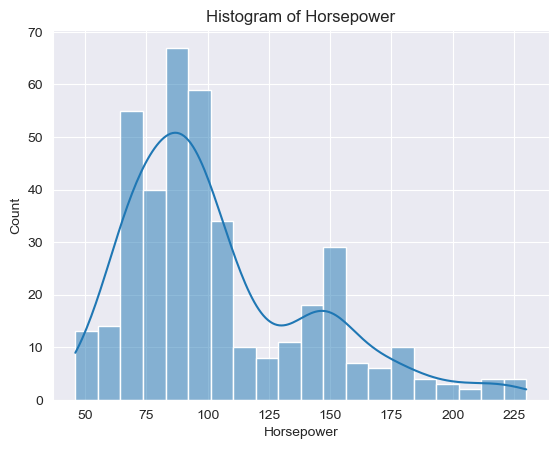

Text(0.5, 1.0, 'Boxplot of Horsepower')

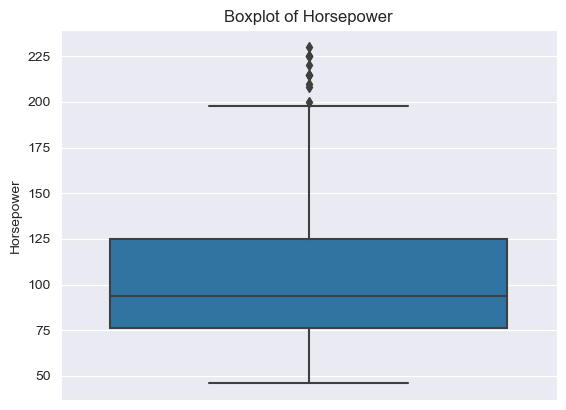

In [286]:

sns.histplot(data=cardf, x='Horsepower', kde=True, bins=20)
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.title('Histogram of Horsepower')
plt.show()


sns.boxplot(data=cardf, y='Horsepower')
plt.ylabel('Horsepower')
plt.title('Boxplot of Horsepower')

In [247]:
#imputing median for na values 
hp_med = cardf["Horsepower"].median()
cardf["Horsepower"].fillna(hp_med, inplace = True)

# test
assert cardf["Horsepower"].isna().sum() == 0

In [248]:
#Duplicate value check
cardf.duplicated().sum()

0

In [249]:
cardf.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [250]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [251]:
num_cols = ['Acceleration', 'Cylinders', 'Displacement', 'Horsepower',
       'MPG', 'Weight']


In [252]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Acceleration  398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   MPG           398 non-null    float64
 5   Weight        398 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 18.8 KB


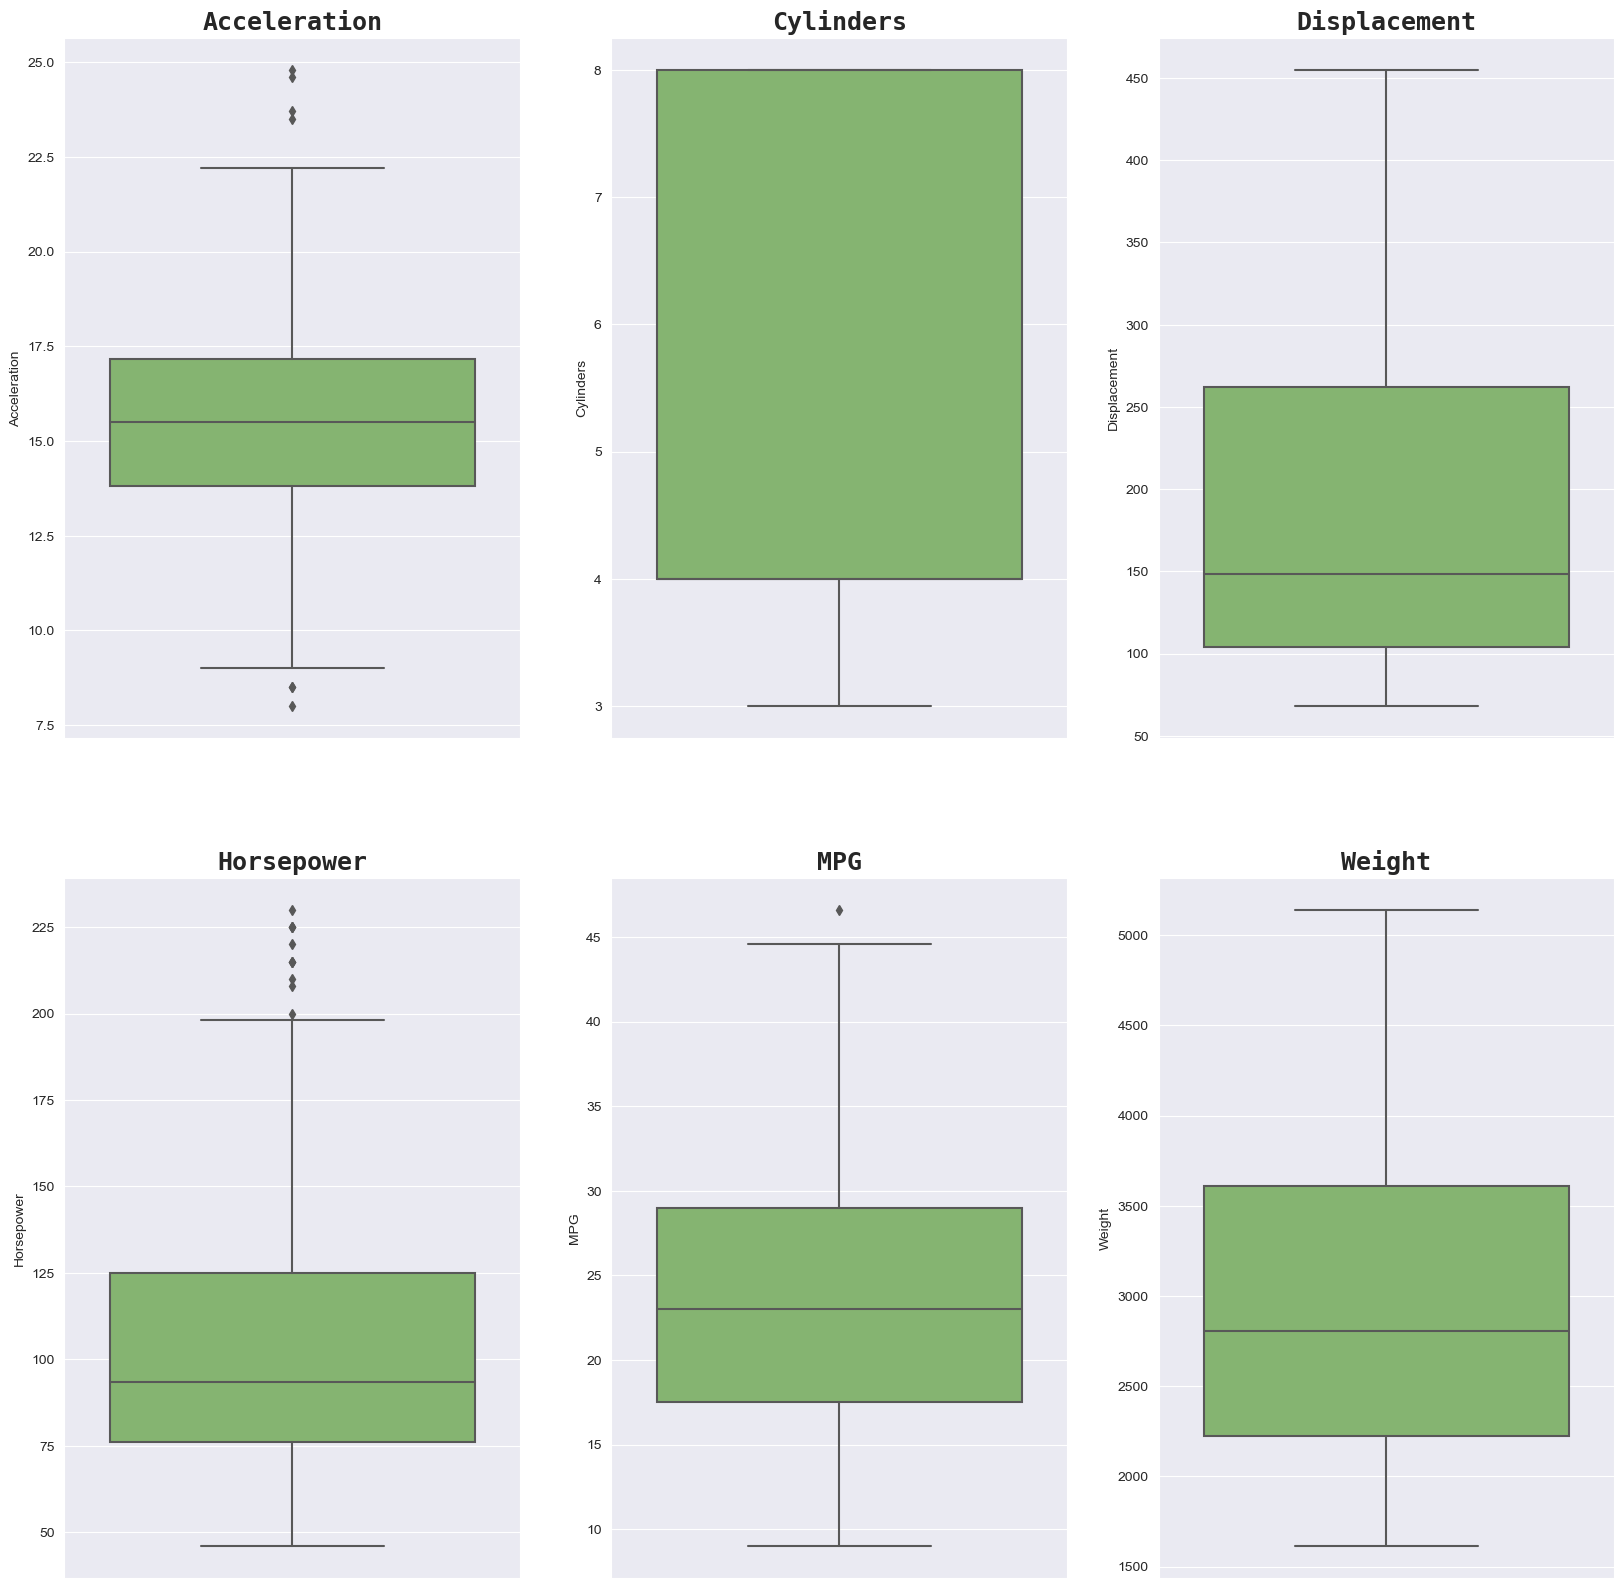

In [253]:
#EDA
fig, ax = plt.subplots(2, 3, figsize = (20, 20))
for i, col in enumerate(num_df.columns):
    g = sns.boxplot(data = num_df, y = col, ax = ax[i // 3, i % 3], palette = "summer")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

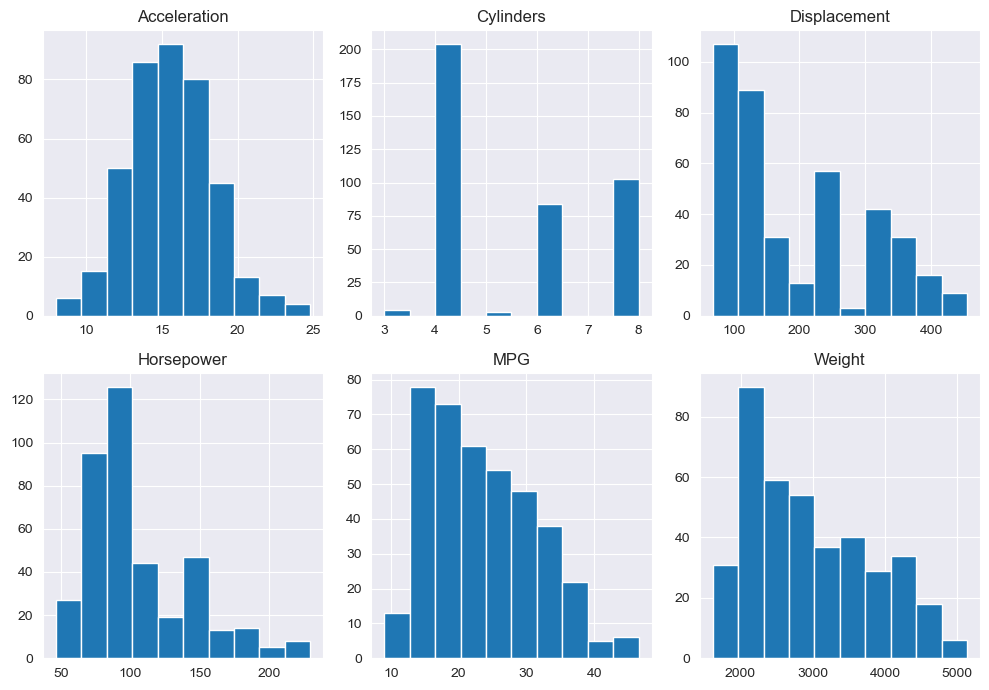

In [254]:
# Plot the histogram 
fig, axs = plt.subplots(2, 3, figsize=(10, 7))
num_df.hist(ax=axs)
plt.tight_layout()
plt.show()

<AxesSubplot:>

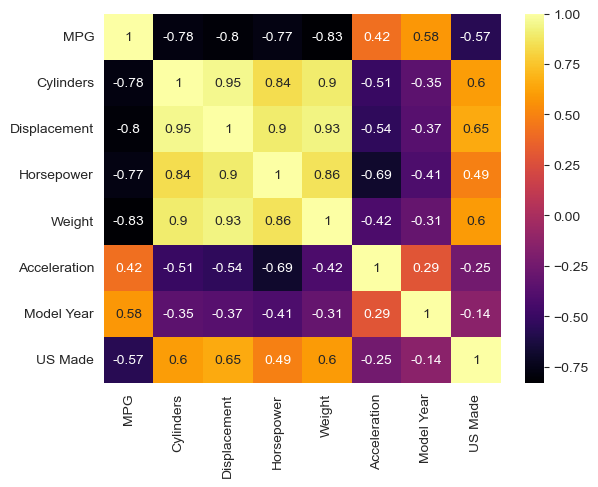

In [255]:
# Calculate the correlation matrix
corr = cardf.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap='inferno')

In [257]:
#creating duplicate
car_yr = cardf.copy()

In [258]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [259]:
car_yr['Model Year'] = '19' + car_yr['Model Year'].astype(str)

In [260]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


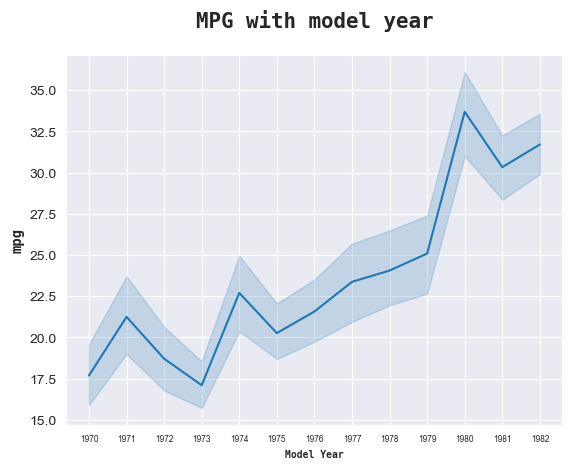

In [261]:
plot = sns.lineplot(data = car_yr, x = "Model Year", y = "MPG")
# titles
plot.set_title("MPG with model year", fontsize = 15,weight = "bold", 
            fontname = "monospace", pad = 20)
plot.set_xlabel("Model Year", fontsize =  7,  weight = "semibold", fontname = "monospace")
plot.set_ylabel("mpg", fontsize = 10,  weight = "semibold", fontname = "monospace")
plot.tick_params(axis='x', which='both', labelsize=6)
plt.show()

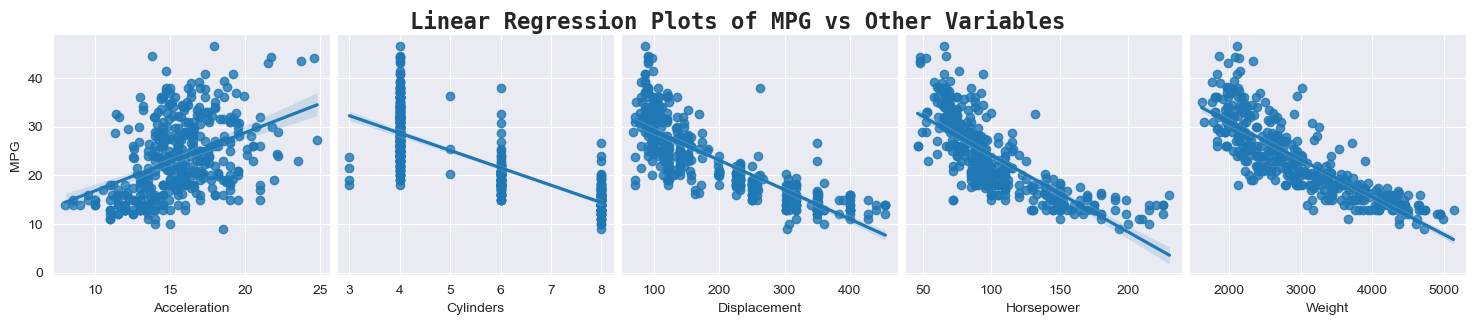

In [271]:
# Set the style
sns.set_style("darkgrid")

# Create the pairplot
sns.pairplot(data=cardf, y_vars=["MPG"], x_vars=["Acceleration", "Cylinders", "Displacement", "Horsepower", "Weight"], kind="reg", height=3)

# Set the titles and labels
plt.suptitle("Linear Regression Plots of MPG vs Other Variables", fontsize=16, fontweight="bold", fontname="monospace", y=1.05)
#plt.xlabel("Variable", fontsize=12, fontweight="semibold", fontname="monospace")
plt.ylabel("MPG", fontsize=12, fontweight="semibold", fontname="monospace")

# Show the plot
plt.show()

In [263]:
#Split independent from dependent variables (x,y)
X = cardf.drop("MPG",axis=1)
y = cardf["MPG"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

### Linear Regression Model 

In [264]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 149 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    int64  
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
 6   US Made       318 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 19.9 KB


In [267]:
#linear regression model 
const1 = sm.add_constant(X_train) 
model = sm.OLS(y_train, const1)
result1 = model.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     201.1
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          3.12e-111
Time:                        11:50:21   Log-Likelihood:                -835.28
No. Observations:                 318   AIC:                             1687.
Df Residuals:                     310   BIC:                             1717.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.8466      5.214     -3.423   

### Backward feature selection

In [270]:
# Perform backward selection
#remove 'Acceleration'
X1 = cardf.drop(["MPG","Acceleration"],axis=1)
y1 = cardf["MPG"]
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=100)


const2 = sm.add_constant(X1_train) 
model2 = sm.OLS(y1_train, const2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     235.0
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          2.42e-112
Time:                        13:28:16   Log-Likelihood:                -835.50
No. Observations:                 318   AIC:                             1685.
Df Residuals:                     311   BIC:                             1711.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.2420      4.613     -3.521   

In [272]:
#remove 'cylinders'
X2 = cardf.drop(["MPG","Acceleration","Cylinders"],axis=1)
y2 = cardf["MPG"]
# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=100)


const3 = sm.add_constant(X2_train) 
model3 = sm.OLS(y2_train, const3)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     281.8
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          2.21e-113
Time:                        13:46:38   Log-Likelihood:                -835.99
No. Observations:                 318   AIC:                             1684.
Df Residuals:                     312   BIC:                             1707.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1067      4.527     -3.779   

In [274]:
#remove 'Horsepower'

X3 = cardf.drop(["MPG","Acceleration","Cylinders","Horsepower"],axis=1)
y3 = cardf["MPG"]
# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size=0.2, random_state=100)


const3 = sm.add_constant(X3_train) 
model3 = sm.OLS(y3_train, const3)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     350.0
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          3.80e-114
Time:                        14:35:59   Log-Likelihood:                -837.25
No. Observations:                 318   AIC:                             1685.
Df Residuals:                     313   BIC:                             1703.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.8981      4.392     -4.302   